In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("heart.csv",header=0,delimiter=',',encoding='utf-8')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.index

RangeIndex(start=0, stop=303, step=1)

In [4]:
columns_eda=df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

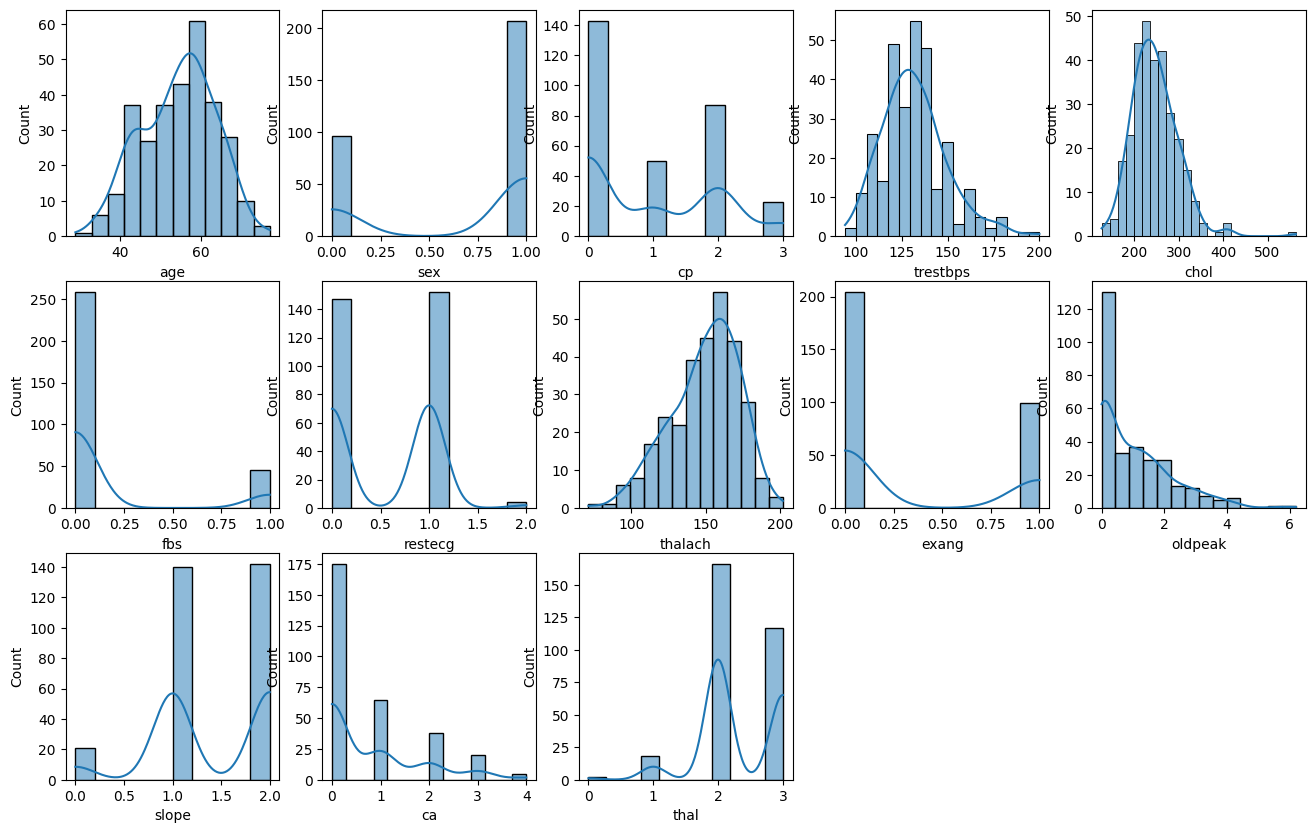

In [8]:
# phân phối các biển số input
fig=plt.figure(figsize=(16,10))
for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub=fig.add_subplot(3,5,i+1)
    sns.histplot(data=df, x=colname,kde=True)
    

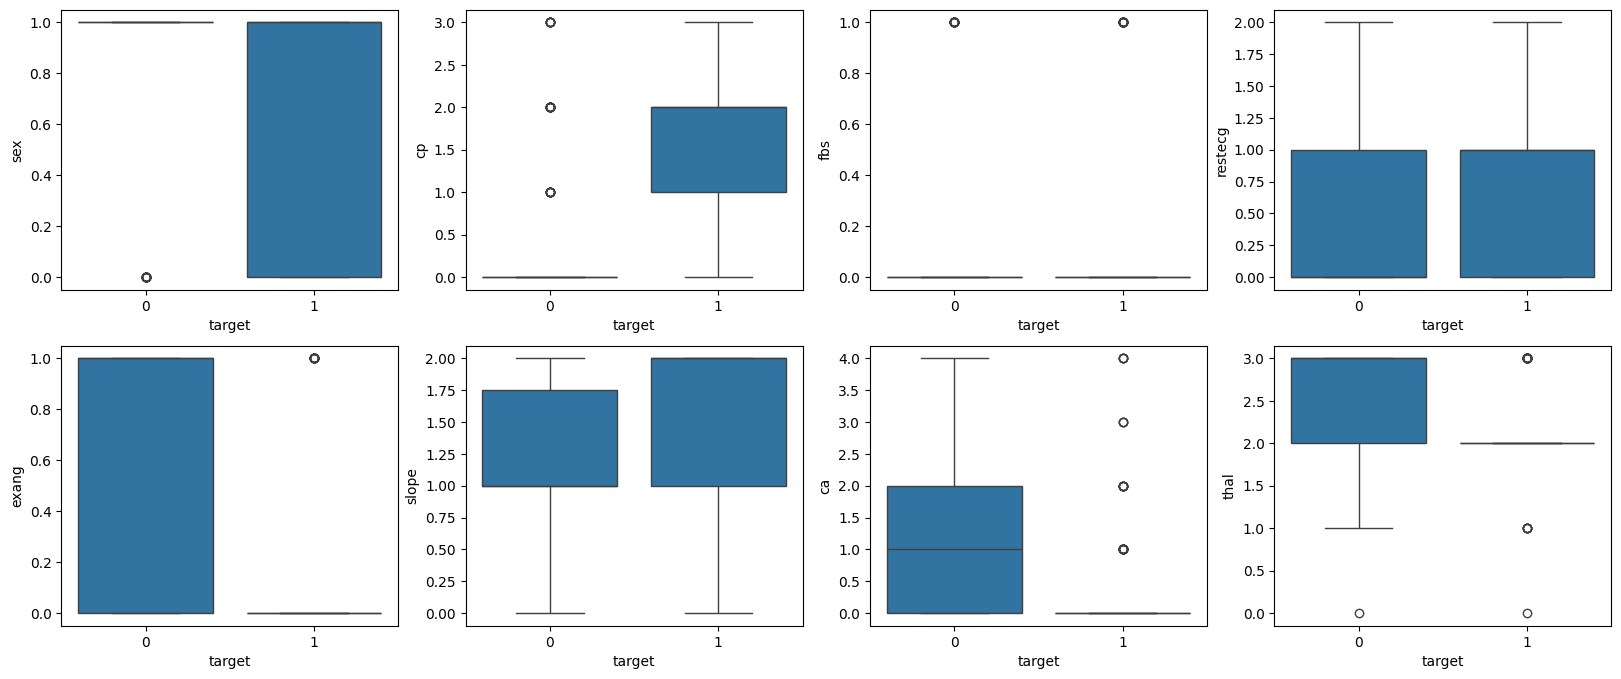

In [9]:
# đếm xem số lượng các biến input(nhóm định tính) theo biến mục tiêu
categories_list=['sex','cp','fbs','restecg','exang','slope','ca','thal']
fig = plt.figure(figsize=(20,8))
for i in range(len(categories_list)):
    colname=categories_list[i]
    sub=fig.add_subplot(2,4,i+1)
    sns.boxplot(data=df,y=colname,x="target")

In [11]:
# Xây dựng mô hình
# a. Chuẩn bị dữ liệu
x = df.iloc[:,:-1].values
y = df[['target']].values
x = X.astype(float)
y = y.astype(float)

In [13]:
# b.Phân chia tập dữ liệu thành 2 phần
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,indices_train, indices_test= train_test_split(x,y,df.index,test_size=0.2, random_state=42)


In [14]:
# c.Hiển thị ds index của sample trong tập X_train,Y_train
print(indices_test)


Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45, 175,
       118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283, 254,  73,
       231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,  57,  92,  77,
       137, 116,   7, 251, 281,  78, 292, 232, 219, 255,  63,  82, 236, 204,
       249, 104, 300, 193, 184],
      dtype='int64')


In [15]:
# d.Huấn luyện mô hình
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8,algorithm='ball_tree')
knn.fit(X_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [16]:
# e.Đánh giá mô hình trên tập test bằng độ đo accuracy 
knn.score(X_test, y_test)

0.6885245901639344

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:2

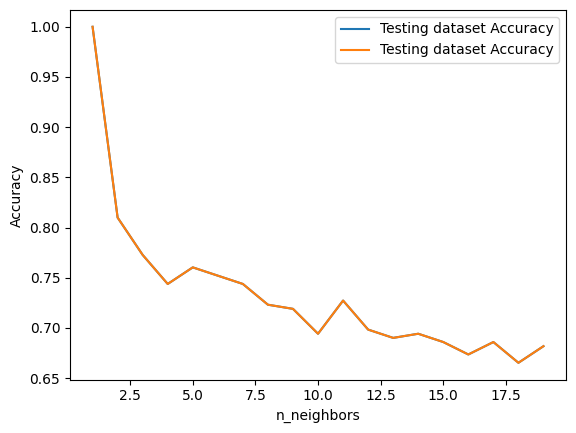

In [17]:
# f.Sử dụng độ đo đánh giá accuracy trên tập train và test 
# để so sánh và chọn lựa K bao 
# nhiêu là tốt nhất cho mô hình K-NN. 
# Sinh viên nhìn biểu đồ để trả lời 
import numpy as np
neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # compute training and text data accuracy
    train_accuracy[i]=knn.score(X_train, y_train)
    test_accuracy[i]=knn.score(X_train, y_train)
# Generate plot
plt.plot(neighbors,test_accuracy,label='Testing dataset Accuracy')
plt.plot(neighbors,train_accuracy,label='Testing dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
# test và train gần như trùng nhau nên lựa K trong khoảng 3,5

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


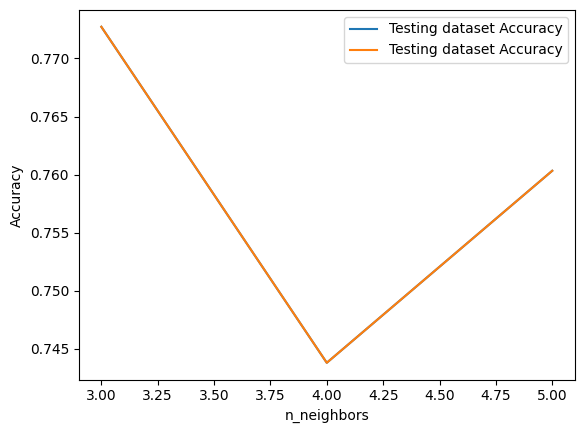

In [18]:
# 5
import numpy as np
neighbors=np.arange(3,6)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # compute training and text data accuracy
    train_accuracy[i]=knn.score(X_train, y_train)
    test_accuracy[i]=knn.score(X_train, y_train)
# Generate plot
plt.plot(neighbors,test_accuracy,label='Testing dataset Accuracy')
plt.plot(neighbors,train_accuracy,label='Testing dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# 6.In ra danh sách khoảng cách và các hàng xóm 
# từ các mẫu dữ liệu trong tập test từ mô hình ở câu 5 
distances,indices=knn.kneighbors(X_test)
distances,indices

(array([[ 6.63626401, 17.93906352, 18.22882333, 23.23122898, 24.27673784],
        [20.96759404, 21.51650529, 26.15415837, 27.35616932, 27.89336839],
        [46.55276576, 46.92589903, 53.2169146 , 54.00962877, 54.00962877],
        [15.49870962, 18.20466973, 18.77471704, 56.31349749, 58.30686066],
        [14.45821566, 18.65368596, 23.08332732, 23.13201245, 23.40939982],
        [18.4       , 21.65733132, 23.94911272, 23.94911272, 27.62173058],
        [ 7.07389567, 12.38709005, 14.        , 14.83239697, 14.96529318],
        [32.32274741, 46.79059735, 47.96873982, 48.27007354, 48.59269492],
        [16.40853436, 17.99555501, 21.3541565 , 21.50441815, 22.15152365],
        [12.77693234, 13.9645981 , 14.08012784, 14.67140075, 15.18848248],
        [10.04788535, 10.94349122, 12.87012043, 14.1876707 , 15.68948693],
        [11.69444312, 22.19549504, 24.38360105, 33.0236279 , 34.76550014],
        [14.76617757, 16.21850795, 19.64408308, 20.17523234, 21.9089023 ],
        [15.66045976, 16.

In [20]:
# 7.Cho biết sample input đầu tiên trong tập test sẽ lần lượt gần K (hàng xóm) dòng nào trong
# tập train tính theo index và khoảng cách tương đương theo độ đo Euclidean là bao nhiêu? 
# Lấy mẫu đầu tiên trong tập test
from scipy.spatial import distance
from scipy.spatial.distance import euclidean
sample_test = X_test[0]
print(f"Mẫu test đầu tiên: {sample_test}")

# Tính khoảng cách Euclidean giữa sample_test và tất cả các mẫu trong tập huấn luyện
distances = np.array([distance.euclidean(sample_test, x_train) for x_train in X_train])

# Lấy các chỉ số của K hàng xóm gần nhất (K nhỏ nhất trong distances)
nearest_neighbors_indices = distances.argsort()[:k]

# In ra chỉ số và khoảng cách của K hàng xóm gần nhất
print("\nK hàng xóm gần nhất và khoảng cách tương ứng:")
for i, idx in enumerate(nearest_neighbors_indices):
    print(f"Hàng xóm {i+1}: Index = {idx}, Khoảng cách = {distances[idx]:.4f}")

# In ra các dòng gần nhất trong tập train
nearest_neighbors = X_train[nearest_neighbors_indices]
print("\nCác dòng gần nhất trong tập train:")
print(nearest_neighbors)

Mẫu test đầu tiên: [ 57.    1.    0.  150.  276.    0.    0.  112.    1.    0.6   1.    1.
   1. ]

K hàng xóm gần nhất và khoảng cách tương ứng:
Hàng xóm 1: Index = 1, Khoảng cách = 6.6363
Hàng xóm 2: Index = 79, Khoảng cách = 17.9391
Hàng xóm 3: Index = 161, Khoảng cách = 18.2288
Hàng xóm 4: Index = 222, Khoảng cách = 23.2312
Hàng xóm 5: Index = 211, Khoảng cách = 24.2767

Các dòng gần nhất trong tập train:
[[ 58.    1.    0.  150.  270.    0.    0.  111.    1.    0.8   2.    0.
    3. ]
 [ 67.    1.    0.  160.  286.    0.    0.  108.    1.    1.5   1.    3.
    2. ]
 [ 70.    1.    2.  160.  269.    0.    1.  112.    1.    2.9   1.    1.
    3. ]
 [ 62.    0.    0.  138.  294.    1.    1.  106.    0.    1.9   1.    3.
    2. ]
 [ 57.    1.    0.  152.  274.    0.    1.   88.    1.    1.2   1.    1.
    3. ]]


In [21]:
# 8.Cho biết với một sample input tương ứng ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
# 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] = [47,0,0,150,250,0,1,140,1,0.5,1,0,2] thì sẽ 
# gần K hàng xóm nào trong tập huấn luyện, với tương ứng lần lượt khoảng cách là bao nhiêu 
# và cho biết giá trị Age của hàng xóm gần nhất
sample_test = [47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2]
k=4
# Tính khoảng cách Euclidean giữa sample_test và tất cả các mẫu trong tập huấn luyện
distances = np.array([euclidean(sample_test, x_train) for x_train in X_train])

# Lấy các chỉ số của K hàng xóm gần nhất (K nhỏ nhất trong distances)
nearest_neighbors_indices = distances.argsort()[:k]
# In ra chỉ số và khoảng cách của K hàng xóm gần nhất
print("\nK hàng xóm gần nhất và khoảng cách tương ứng:")
for i, idx in enumerate(nearest_neighbors_indices):
    print(f"Hàng xóm {i+1}: Index = {idx}, Khoảng cách = {distances[idx]:.4f}")
# In ra các dòng gần nhất trong tập train
nearest_neighbors = X_train[nearest_neighbors_indices]
print("\nCác dòng gần nhất trong tập train:")
print(nearest_neighbors)
# In ra giá trị 'age' của hàng xóm gần nhất
print(f"\nGiá trị 'Age' của hàng xóm gần nhất: {nearest_neighbors[0][0]}")


K hàng xóm gần nhất và khoảng cách tương ứng:
Hàng xóm 1: Index = 168, Khoảng cách = 16.1323
Hàng xóm 2: Index = 2, Khoảng cách = 20.6545
Hàng xóm 3: Index = 180, Khoảng cách = 21.3834
Hàng xóm 4: Index = 11, Khoảng cách = 21.3965

Các dòng gần nhất trong tập train:
[[ 61.    1.    2.  150.  243.    1.    1.  137.    1.    1.    1.    0.
    2. ]
 [ 46.    1.    2.  150.  231.    0.    1.  147.    0.    3.6   1.    0.
    2. ]
 [ 47.    1.    2.  138.  257.    0.    0.  156.    0.    0.    2.    0.
    2. ]
 [ 62.    0.    0.  150.  244.    0.    1.  154.    1.    1.4   1.    0.
    2. ]]

Giá trị 'Age' của hàng xóm gần nhất: 61.0


In [22]:
# 9.Xem danh sách các giá trị của lớp đánh nhãn của biến output (target) 
# nhằm xác định bệnh nhân có bệnh hay không 
unique_labels = np.unique(y)
print(f"Các giá trị nhãn (target): {unique_labels}")
# 0: ko có bệnh, 1: có bệnh

Các giá trị nhãn (target): [0. 1.]


In [23]:
# 10. Xem danh sách xác suất tiền dự báo của các mẫu dữ liệu tập test
# theo các nhãn đầu ra 
# Dự đoán xác suất nhãn đầu ra cho các mẫu trong tập test
y_proba = knn.predict_proba(X_test)

# In ra xác suất của các mẫu trong tập test
print("Xác suất dự báo cho mỗi nhãn trong tập test:")
for i, probs in enumerate(y_proba):
    print(f"Mẫu {i+1}: {probs}")

Xác suất dự báo cho mỗi nhãn trong tập test:
Mẫu 1: [1. 0.]
Mẫu 2: [0.2 0.8]
Mẫu 3: [0.2 0.8]
Mẫu 4: [0.2 0.8]
Mẫu 5: [0.8 0.2]
Mẫu 6: [0.4 0.6]
Mẫu 7: [0. 1.]
Mẫu 8: [0.8 0.2]
Mẫu 9: [1. 0.]
Mẫu 10: [0.2 0.8]
Mẫu 11: [0.6 0.4]
Mẫu 12: [0.6 0.4]
Mẫu 13: [0.2 0.8]
Mẫu 14: [0.4 0.6]
Mẫu 15: [0.2 0.8]
Mẫu 16: [0. 1.]
Mẫu 17: [0. 1.]
Mẫu 18: [0.4 0.6]
Mẫu 19: [0.4 0.6]
Mẫu 20: [0.8 0.2]
Mẫu 21: [0.6 0.4]
Mẫu 22: [1. 0.]
Mẫu 23: [0.8 0.2]
Mẫu 24: [0.4 0.6]
Mẫu 25: [0.4 0.6]
Mẫu 26: [0. 1.]
Mẫu 27: [0.8 0.2]
Mẫu 28: [0. 1.]
Mẫu 29: [1. 0.]
Mẫu 30: [0.4 0.6]
Mẫu 31: [0.8 0.2]
Mẫu 32: [0.8 0.2]
Mẫu 33: [1. 0.]
Mẫu 34: [0. 1.]
Mẫu 35: [0.6 0.4]
Mẫu 36: [0.8 0.2]
Mẫu 37: [0.2 0.8]
Mẫu 38: [0.2 0.8]
Mẫu 39: [0. 1.]
Mẫu 40: [0. 1.]
Mẫu 41: [0.4 0.6]
Mẫu 42: [0.2 0.8]
Mẫu 43: [1. 0.]
Mẫu 44: [0. 1.]
Mẫu 45: [0.2 0.8]
Mẫu 46: [0.6 0.4]
Mẫu 47: [0.4 0.6]
Mẫu 48: [0.2 0.8]
Mẫu 49: [0.6 0.4]
Mẫu 50: [0.2 0.8]
Mẫu 51: [0.4 0.6]
Mẫu 52: [0.6 0.4]
Mẫu 53: [0.6 0.4]
Mẫu 54: [0.4 0.6]
Mẫu 55: [0.4 0.6]
Mẫu 

In [24]:
# 11.  Cho biết mẫu input thứ hai trong tập test  
# khi qua mô hình dự báo sẽ cho xác xuất dự báo 
# nhãn nào cao hơn và giá trị là bao nhiêu, 
# còn nhãn thấp là nhãn nào có xác suất bao nhiêu
# Dự đoán xác suất nhãn đầu ra cho các mẫu trong tập test
y_proba = knn.predict_proba(X_test)

# Lấy xác suất cho mẫu thứ hai trong tập test
second_sample_proba = y_proba[1]  # Chỉ số 1 tương ứng với mẫu thứ hai
labels = np.unique(y)

# Xác định nhãn có xác suất cao hơn và thấp hơn
max_prob_label = labels[np.argmax(second_sample_proba)]
max_prob_value = second_sample_proba.max()
min_prob_label = labels[np.argmin(second_sample_proba)]
min_prob_value = second_sample_proba.min()

# In kết quả
print(f"Xác suất dự báo cho mẫu thứ hai:")
for i, label in enumerate(labels):
    print(second_sample_proba[i])

print(f"\nNhãn có xác suất cao hơn: {max_prob_label} với giá trị xác suất {max_prob_value:.4f}")
print(f"Nhãn có xác suất thấp hơn: {min_prob_label} với giá trị xác suất {min_prob_value:.4f}")

Xác suất dự báo cho mẫu thứ hai:
0.2
0.8

Nhãn có xác suất cao hơn: 1.0 với giá trị xác suất 0.8000
Nhãn có xác suất thấp hơn: 0.0 với giá trị xác suất 0.2000


In [25]:
# 12. Liệt kê danh sách các nhãn dự báo thông qua 
# mô hình của các mẫu dữ liệu input trong tập test. 
# Hãy cho biết kết quả dự báo của mẫu input thứ 5 
# trong tập test sẽ được dự báo là bao nhiêu?
y_test_predicted=knn.predict(X_test)
y_test_predicted

array([0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0.])

In [26]:
# 13. Hãy cho biết nếu điều chỉnh ngưỡng xác suất (threshold) đưa ra quyết định là 0.65 
# thì kết quả dự báo của mẫu input số hai và 
# mẫu số năm và mẫu số sáu là bao nhiêu
print('prediction with thresold 0.65:')
y_pred_test_065=(knn.predict_proba(X_test)[:, 1]>=0.65).astype(float)
y_pred_test_065

prediction with thresold 0.65:


array([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [27]:
# 14. Hãy đánh giá mô hình trên tập test qua Confussion – Matrix
from sklearn.metrics import confusion_matrix
cfmx = confusion_matrix(y_test, y_test_predicted)
cfmx
# TP:11, FP:24, FN:8,TN:18

array([[18, 11],
       [ 8, 24]], dtype=int64)

In [ ]:
# 15. Dựa vào confusion matrix, 
# hãy cho biết giá trị quan trọng nhất trong bài toán dự báo này. 
# FN quan trọng nhất

In [28]:
# 16. Hãy đánh giá mô hình thông qua các giá trị Precision, Recall và F1 tổng quát.
# Trong bài toán dự báo này thì đại lượng nào quan trọng. 
# Tính toán Precision, Recall, F1 Score
precision = Precision(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# In kết quả
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# In báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

NameError: name 'Precision' is not defined

In [29]:
# 17. Hãy in ra bảng báo cáo các đại lượng đánh giá theo từng nhóm giá trị nhãn đầu ra 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65        29
         1.0       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



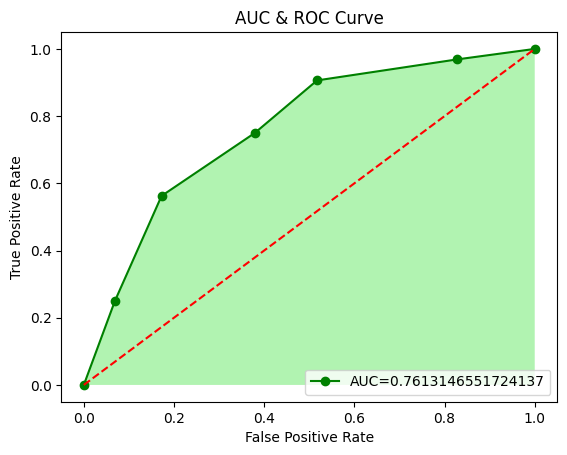

In [30]:
# 18. Đánh giá mô hình thông qua đồ thị AUC & ROC 
from sklearn import metrics
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr,tpr,_= metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr,tpr,facecolor='lightgreen',alpha=0.7)
plt.show()